## Problem 1 - Chick Data

### Part 1 - generally describe the dataset in 'chickwts.txt'

"chickwts.txt" contains two columns; the first column is the **weight** of the chick and the second column is the type of **feed**. There are coloumn headers in the first row and the columns are delimited by a comma. There are 6 **feed** types and a total of 71 data points. 

### Part 2 - generate a plot that summarizes all of the data in 'chickwts.txt'

- Basic steps:

    + Import needed packages
    
    + Load data
    
    + Create plot

In [31]:
#import necessary packages
import numpy
import pandas
import scipy
import scipy.integrate as spint
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.stats import chi2
from plotnine import *

In [32]:
#load data
chickwts = pandas.read_csv("chickwts.txt",header=0,sep=",")

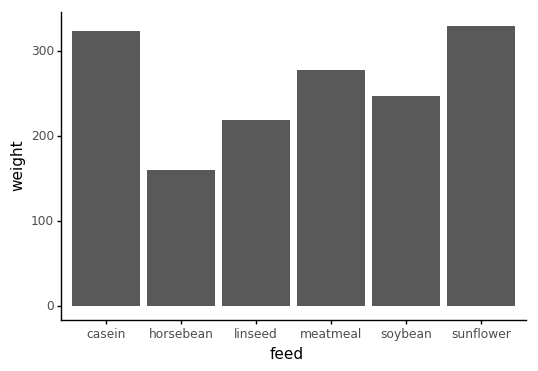

<ggplot: (16426416)>

In [33]:
#code for plot:
ggplot(chickwts,aes(x='feed',y='weight'))+geom_bar(stat="summary",fun_y=numpy.mean)+theme_classic()

### Part 3 - states a null and alternative hypothesis for difference in chick weight  when fed soybean vs. sunflower feed

Basic steps:

- Pull out only the feed types we are interested in (soybean and sunflower)

In [34]:
#Pull out only the feed types we are interested in
Subset=chickwts.loc[chickwts.feed.isin(['soybean', 'sunflower']),:]

- Make dataframes to use for modeling

In [35]:
#Make a dataframe to use in modeling
SubsetFrame=pandas.DataFrame({'y':Subset.weight,'x':0})
SubsetFrame.loc[Subset.feed=='sunflower','x']=1

- What are the hypotheses?

    + *Null hypothesis:* There is no difference in chick weight when fed soybean or sunflower feed.

    + *Alternative hypothesis:* There is a significant difference in chick weight between those fed soybean feed and those fed sunflower feed.

### Part 4 - tests the null hypothesis above using a likelihood ratio test (only chicks fed soybean or sunflower feed)

- Define the null model

In [36]:
def nllike_null(p_null,obs_null):
    B0_null=p_null[0]
    sigma_null=p_null[1]
    expected_null=B0_null
    nll_null=-1*norm(expected_null,sigma_null).logpdf(obs_null.y).sum()
    return nll_null

- Define the alternative model

In [37]:
def nllike_alt(p_alt,obs_alt):
    B0_alt=p_alt[0]
    B1_alt=p_alt[1]
    sigma_alt=p_alt[2]
    expected_alt=B0_alt+B1_alt*obs_alt.x
    nll_alt=-1*norm(expected_alt,sigma_alt).logpdf(obs_alt.y).sum()
    return nll_alt

- Likelihood Ratio Tests

In [38]:
#Null model
initialGuess_null=numpy.array([1,1])
fit_null_SubsetFrame=minimize(nllike_null,initialGuess_null,method="Nelder-Mead",options={'disp':True},args=SubsetFrame)
print("estimated parameters for null model")
print(fit_null_SubsetFrame.x)
print("negative log likelihood for null model")
nll_null_SubsetFrame=fit_null_SubsetFrame.fun
print(nll_null_SubsetFrame) #prints negative log likelihood value for null model

Optimization terminated successfully.
         Current function value: 145.240592
         Iterations: 85
         Function evaluations: 162
estimated parameters for null model
[ 284.49999051   64.53691755]
negative log likelihood for null model
145.240592097


In [39]:
#Alternative Model
initialGuess_alt=numpy.array([1,1,1])
fit_alt_SubsetFrame=minimize(nllike_alt,initialGuess_alt,method="Nelder-Mead",options={'disp':True},args=SubsetFrame)
print("estimated parameters for alternative model")
print(fit_alt_SubsetFrame.x)
print("negative log likelihood for alternative model")
nll_alt_SubsetFrame=fit_alt_SubsetFrame.fun
print(nll_alt_SubsetFrame) #prints negative log likelihood values

Optimization terminated successfully.
         Current function value: 138.469162
         Iterations: 200
         Function evaluations: 363
estimated parameters for alternative model
[ 246.42855057   82.48813575   49.73948886]
negative log likelihood for alternative model
138.469161825


### Part 5 - interprets the results of the likelihood ratio test

- Calculate D score

In [40]:
D_SubsetFrame=2*(nll_null_SubsetFrame-nll_alt_SubsetFrame)
print("D value")
print(D_SubsetFrame)

D value
13.5428605444


- Calculate p value

In [41]:
p_value_SubsetFrame=1-scipy.stats.chi2.cdf(x=D_SubsetFrame,df=1)
print("p-value")
print(p_value_SubsetFrame)

p-value
0.000233176728695


- Make conclusions about the hypotheses from our likelihoo ratio test

    + With a p-value less than 0.05, our *alternative hypothesis* was correct. *There is a significant difference in the chick weights between soybean feed and sunflower feed.*